#### Code Evaluation
In this notebook, the performance of the implemented methods for a genetic algorithm that aims to solve the job sequencing problem will be evaluated and discussed.

In [1]:
from genetic import Job, ga_run, run_experiments
import pandas as pd
import matplotlib.pyplot as plt

Import success


In [2]:
df = pd.read_csv("resources/new_example.csv")
#df = pd.read_csv("resources/example_problems(p2).csv")

df.head

<bound method NDFrame.head of     a  3  10
0   b  2   5
1   c  5  10
2   d  1  10
3   e  3  30
4   f  1  20
5   g  2  10
6   h  4  25
7   i  2  15
8   j  3  35
9   k  1   5
10  l  4  40
11  m  2  20
12  n  3  15
13  o  5  50
14  p  1  30
15  q  2  12
16  r  4  22
17  s  3  18
18  t  1   8
19  u  5  45
20  v  2  28
21  w  3  33
22  x  4  12
23  y  1   7
24  z  2   9>

#### Dataset
The algorithm makes use of example datasets, which can be found under the folder "resources". A dataset is an example of a schedule, which lists all the available jobs the genetic algorithm can make use of to construct an optimal job sequence.

The datasets are stored in csv file format, where the order of a row can be defined as "job identifier", "job deadline" and "job profit".

Below is an implementation of the way the genetic algorithm should be used in code. Users can play around with the population size, generation count, mutation rate and the following underlying algorithmic methods:

**Selection method**
- Roulette wheel selection ("<code>roulette</code>")
- Tournament selection ("<code>tournament</code>")
- Elitism selection ("<code>elitism</code>")


**Crossover method**
- Order crossover ("<code>order</code>")
- Partially mapped crossover ("<code>pmx</code>")


**Mutation method**
- Swap mutation ("<code>swap</code>")
- Random reset mutation ("<code>random_reset</code>")

In [3]:
id_ = df.iloc[:,0]
deadline = df.iloc[:,1]
profit = df.iloc[:,2]

jobs = [Job(id_[i], deadline[i], profit[i]) for i in range(len(id_))]
max_profit, job_count, best_schedule = ga_run(
    jobs, 
    pop_size=100,
    generations=700, 
    mutation_rate=0.4,
    tournament_size=8,
    selection_method="roulette",
    crossover_method="order",
    mutation_method="random_reset")

print(f"\nNumber of jobs completed: {job_count}, Maximum profit: {max_profit}")

Initial Population of Chromosomes:
Chromosome 1: Schedule = [23, 19, 8, 7, 12, 20, 16, 2, 6, 24, 18, 11, 1, 21, 14, 0, 22, 4, 15, 17, 13, 5, 9, 10, 3]
Chromosome 2: Schedule = [14, 15, 9, 24, 4, 2, 13, 7, 11, 5, 20, 0, 16, 8, 1, 23, 22, 10, 18, 19, 3, 17, 12, 6, 21]
Chromosome 3: Schedule = [12, 14, 6, 5, 18, 0, 3, 16, 4, 11, 23, 24, 10, 20, 1, 15, 8, 17, 13, 9, 22, 2, 7, 21, 19]
Chromosome 4: Schedule = [23, 2, 9, 13, 5, 21, 3, 18, 11, 15, 16, 20, 0, 6, 12, 8, 4, 1, 14, 17, 22, 10, 19, 7, 24]
Chromosome 5: Schedule = [8, 6, 3, 20, 5, 17, 18, 22, 1, 10, 19, 2, 4, 21, 12, 15, 11, 7, 13, 23, 16, 0, 24, 9, 14]
Chromosome 6: Schedule = [7, 5, 17, 11, 6, 1, 3, 9, 23, 16, 24, 13, 14, 20, 19, 2, 18, 0, 21, 15, 12, 8, 22, 10, 4]
Chromosome 7: Schedule = [24, 11, 9, 14, 22, 7, 8, 4, 23, 15, 19, 18, 6, 17, 3, 12, 21, 16, 20, 13, 0, 1, 2, 5, 10]
Chromosome 8: Schedule = [23, 11, 5, 8, 4, 10, 16, 13, 12, 24, 2, 20, 18, 7, 22, 6, 15, 21, 3, 19, 0, 9, 14, 1, 17]
Chromosome 9: Schedule = [16, 1, 24, 

In [4]:
print(f"\nNumber of jobs completed: {job_count}, Maximum profit: {max_profit}")
print(f"Genetic Algorithm Scheduled Jobs:\n {best_schedule}")


Number of jobs completed: 5, Maximum profit: 183
Genetic Algorithm Scheduled Jobs:
 ['l', 's', 'e', 'u', 'o']


### Greedy Comparison
To judge the maximum profit output for the genetic algorithm, it will be compared to the output of a greedy algorithm. See the implementation of the algorithm below:

In [5]:
def greedy(jobs):
    jobs.sort(key=lambda x: x.profit, reverse=True)
    max_deadline = max(job.deadline for job in jobs)
    time_slots = [-1] * max_deadline
    total_profit = 0
    completed_jobs = 0

    for job in jobs:
        for t in range(job.deadline - 1, -1, -1):
            if time_slots[t] == -1:
                time_slots[t] = job.id
                total_profit += job.profit
                completed_jobs += 1
                break

    print("Greedy Algorithm Scheduled Jobs:\n", time_slots)
    return completed_jobs, total_profit

In [6]:
greedy_jobs, greedy_profit = greedy(jobs)
print(f"\nGreedy Algorithm:\n Jobs completed: {greedy_jobs}. Maximum profit: {greedy_profit}.")

Greedy Algorithm Scheduled Jobs:
 ['w', 'j', 'l', 'u', 'o']

Greedy Algorithm:
 Jobs completed: 5. Maximum profit: 203.


#### Plotting the results
To examine the convergence rate of different methods in combination with one another, the results from runs will be plotted in a graph. Each selection method, elitism, roulette wheel and tournament, will be compared to the different methods for mutation and crossover.

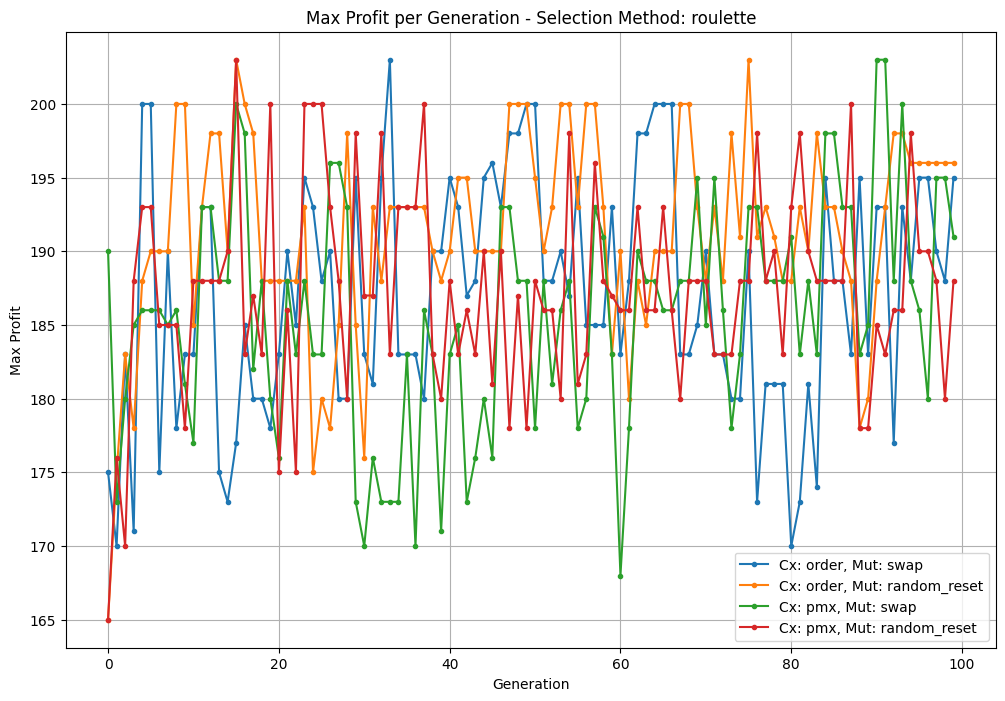

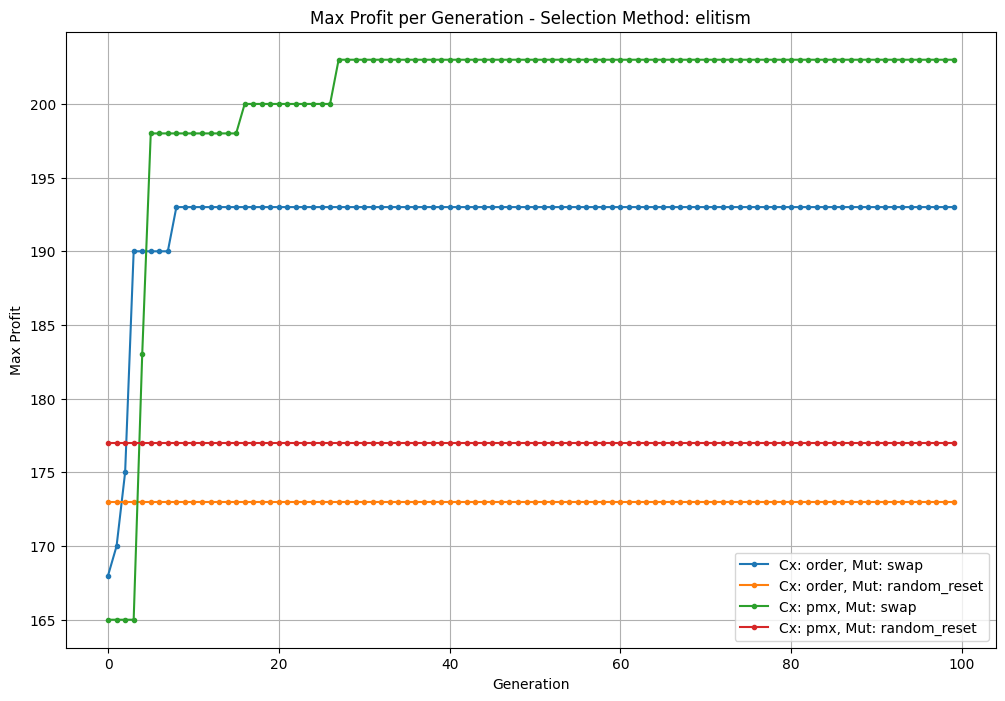

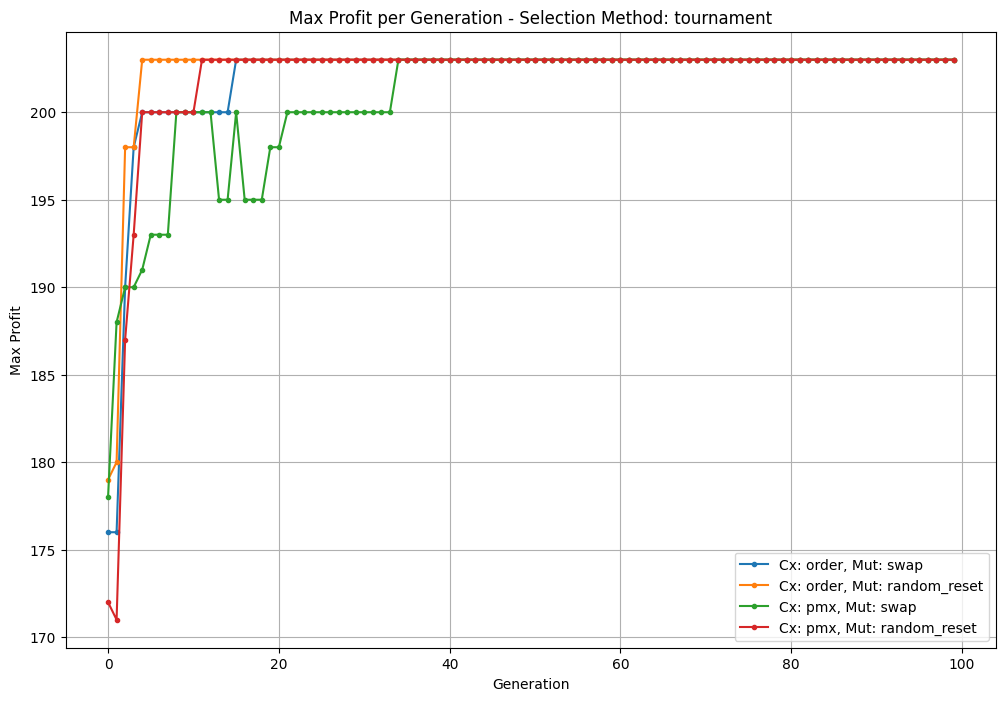

In [ ]:
def plot_results(results):
    selection_methods = set(key[0] for key in results.keys())

    for selection_method in selection_methods:
        plt.figure(figsize=(12, 8))
        
        for (sel_method, crossover_method, mutation_method), profits in results.items():
            if sel_method == selection_method:
                plt.plot(profits, label=f'Cx: {crossover_method}, Mut: {mutation_method}', marker='.')

        plt.title(f'Max Profit per Generation - Selection Method: {selection_method}')
        plt.xlabel('Generation')
        plt.ylabel('Max Profit')
        plt.legend()
        plt.grid()
        plt.show()

results = run_experiments(jobs, pop_size=100, generations=100, mutation_rate=0.15)

plot_results(results)

#### Evaluation

When looking at the visualization, the following can be noted:

For the selection methods, elitism and tournament selection seem to be the most effective. Tournament selection works especially well across all crossover and mutation methods, reaching convergence before the 100th generation. For elitism, both order and partially mapped crossover reach convergence before the 100th generation. Order crossover and swap mutation will not always find the global optimum, usually settling on a local optimum that's "good enough". However random reset mutation does not seem to work for elitism. This might be due to either a fault in code, or elitism not working in combination with a mutation method that introduces randomness into the genetic sequence.

Roulette selection seems to not work properly, since it never reaches convergence, with the fitness never being able to gradually improve, but improving/worsening at random. This can be due to the fact that parent selection with roulette wheel selection makes picking a fit parent too random, since parents with a worse fitness are still able to be chosen for crossover.

#### Conclusion
Based on these results, parent selection seems to be the most deciding factor in solving the job sequence problem using genetic algorithms, based on the implemented methods.

Tournament and elitism selection seem to be the methods best fit for parent selection, since their improvement rates are stable and reach convergence relatively soon, usually before the 100th generation when using a population of 100 with the mutation rate being 0.15. For elitism however, random reset mutation does not seem to improve fitness, with swap mutation being a method that works well for elitism.

The implementation for roulette selection turns out to not work well for the job sequence problem. This can be explained by the fact that it introduces more less fit individuals during crossover, potentially losing individuals that are more fit for crossover. Introducing randomness into the population is always a good thing for genetic algorithms, since it ensures that more different solutions in the search space get explored, so that the algorithm does not prematurely converge. However for the given problem, it introduces too much diversity with less fit individuals, making it difficult for the algorithm to gradually improve its' fitness to find a good solution.